In [1]:
import pandas as pd
data=pd.read_csv('C:/Users/yspark/Desktop/딥러닝교재/제 8장 RNN의 적용과 응용/AMZN.csv', header=0,index_col="Date")
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2019-04-17 to 2020-04-16
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Adj Close    252 non-null float64
Volume       252 non-null int64
dtypes: float64(5), int64(1)
memory usage: 13.8+ KB


In [2]:
print(data.head())

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2019-04-17  1872.989990  1876.469971  1860.439941  1864.819946  1864.819946   
2019-04-18  1868.790039  1870.819946  1859.479980  1861.689941  1861.689941   
2019-04-22  1855.400024  1888.420044  1845.640015  1887.310059  1887.310059   
2019-04-23  1891.199951  1929.260010  1889.579956  1923.770020  1923.770020   
2019-04-24  1925.000000  1929.689941  1898.160034  1901.750000  1901.750000   

             Volume  
Date                 
2019-04-17  2893500  
2019-04-18  2749900  
2019-04-22  3373800  
2019-04-23  4640400  
2019-04-24  3675800  


In [3]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,1864.800556,1883.242064,1846.651429,1866.393093,1866.393093,4.060800e+06
std,110.513502,116.543016,110.148293,114.338644,114.338644,2.035731e+06
min,1641.510010,1725.000000,1626.030029,1676.609985,1676.609985,8.813000e+05
25%,1778.007508,1793.577515,1762.510040,1783.422516,1783.422516,2.748850e+06
50%,1842.005005,1870.639954,1826.875000,1854.284973,1854.284973,3.410900e+06
75%,1921.224945,1936.729980,1898.567535,1912.812469,1912.812469,4.754375e+06
max,2346.000000,2461.000000,2335.000000,2408.189941,2408.189941,1.556730e+07


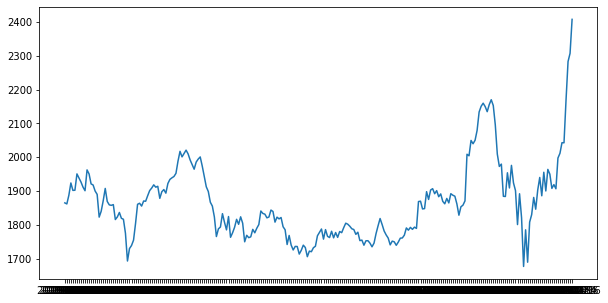

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(data['Close'])
plt.show()

In [5]:
#!pip install statsmodels
from statsmodels.tsa.stattools import adfuller
result=adfuller(data['Close'])
print(result)

(-1.3767742252801614, 0.5933588180241112, 9, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, 2330.001481538131)


In [12]:
#!python -m pip install --upgrade pip

  Using cached https://files.pythonhosted.org/packages/54/0c/d01aa759fdc501a58f431eb594a17495f15b88da142ce14b5845662c13f3/pip-20.0.2-py2.py3-none-any.whl
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1


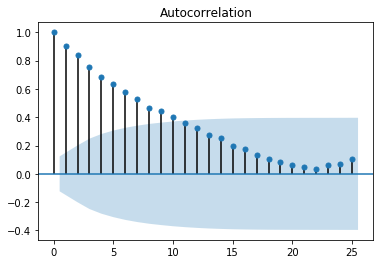

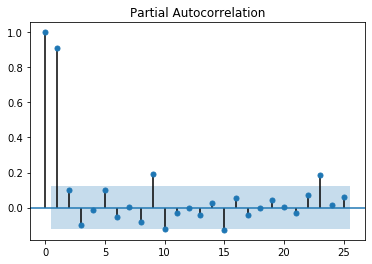

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data['Close'])
plot_pacf(data['Close'])
plt.show()

             Open        High         Low       Close   Adj Close      Volume
count  251.000000  251.000000  251.000000  251.000000  251.000000  251.000000
mean     0.000897    0.001080    0.000905    0.001019    0.001019    0.005657
std      0.020894    0.016299    0.017545    0.019030    0.019030    0.347770
min     -0.075945   -0.058493   -0.072806   -0.082535   -0.082535   -0.970373
25%     -0.008895   -0.006549   -0.007209   -0.007880   -0.007880   -0.209841
50%      0.000475    0.000223    0.001132    0.000514    0.000514   -0.025878
75%      0.009870    0.007017    0.008136    0.008992    0.008992    0.200873
max      0.099056    0.093154    0.078766    0.071196    0.071196    1.919016


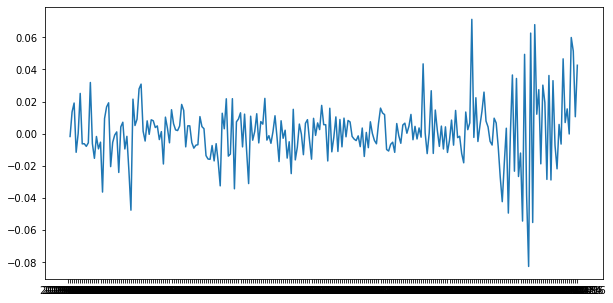

In [7]:
import numpy as np
datapct=data.pct_change()
logreturn=np.log(1+datapct)
logreturn.head()
print(logreturn.describe())
plt.figure(figsize=(10,5))
plt.plot(logreturn['Close'])
plt.show()

In [8]:
from statsmodels.tsa.stattools import adfuller
logreturn=logreturn.dropna()
result=adfuller(logreturn['Close'])
print(result)

(-3.656873938146249, 0.004762316597489944, 8, 242, {'1%': -3.457664132155201, '5%': -2.8735585105960224, '10%': -2.5731749894132916}, -1210.8538494804307)


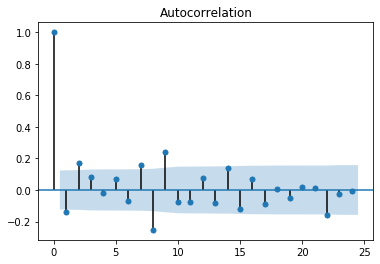

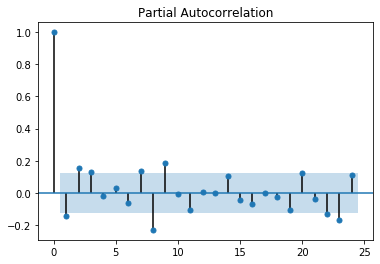

<class 'pandas.core.frame.DataFrame'>


In [9]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(logreturn['Close'])
plot_pacf(logreturn['Close'])
plt.show()
print(type(logreturn))

In [10]:
logr1=logreturn['Close'].values
print(type(logr1))
print(logr1.shape)
logr=logr1.reshape(1,-1)
print(logr.shape)
inte=24
x=[]
y=[]
for i in range(logr.shape[1]):
    if i+inte>logr.shape[1]-1:
        break
    else:
         xx=logr[0,i:i+inte]
         x.append(xx)
         yy=logr[0,i+inte]
         y.append(yy)
print(type(x))
print(type(y))
x=np.asarray(x)
y=np.asarray(y)
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)
x_train=x[:210]
x_test=x[210:]
y_train=y[:210]
y_test=y[210:]

<class 'numpy.ndarray'>
(251,)
(1, 251)
<class 'list'>
<class 'list'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(227, 24)
(227,)


In [25]:
!pip install tensorflow==2.0.0

  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.1.0
    Uninstalling tensorboard-2.1.0:
      Successfully uninstalled tensorboard-2.1.0
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


ERROR: tensorflow-addons 0.7.1 has requirement tensorflow>=2.1.0, but you'll have tensorflow 2.0.0 which is incompatible.
ERROR: tensorboard 2.0.2 has requirement grpcio>=1.24.3, but you'll have grpcio 1.23.0 which is incompatible.


In [11]:
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM
from keras import regularizers
model=Sequential()
model.add(Dense(1,input_shape=(24,)))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Using TensorFlow backend.


Epoch 1/30
210/210 [==============================] - 0s 322us/step - loss: 9.9966e-04 - mae: 0.0222
Epoch 2/30
210/210 [==============================] - 0s 57us/step - loss: 9.6835e-04 - mae: 0.0219
Epoch 3/30
210/210 [==============================] - 0s 47us/step - loss: 9.4423e-04 - mae: 0.0215
Epoch 4/30
210/210 [==============================] - 0s 43us/step - loss: 9.3173e-04 - mae: 0.0214
Epoch 5/30
210/210 [==============================] - 0s 52us/step - loss: 9.0913e-04 - mae: 0.0211
Epoch 6/30
210/210 [==============================] - 0s 57us/step - loss: 8.9655e-04 - mae: 0.0210
Epoch 7/30
210/210 [==============================] - 0s 52us/step - loss: 8.8113e-04 - mae: 0.0208
Epoch 8/30
210/210 [==============================] - 0s 57us/step - loss: 8.6241e-04 - mae: 0.0206
Epoch 9/30
210/210 [==============================] - 0s 62us/step - loss: 8.4889e-04 - mae: 0.0204
Epoch 10/30
210/210 [==============================] - 0s 66us/step - loss: 8.3896e-04 - mae: 0.020

In [12]:
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(Dense(32,activation='relu',input_shape=(24,)))
model.add(Dense(1))                

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
210/210 [==============================] - 0s 323us/step - loss: 4.1091e-04 - mae: 0.0141
Epoch 2/30
210/210 [==============================] - 0s 52us/step - loss: 3.4150e-04 - mae: 0.0126
Epoch 3/30
210/210 [==============================] - 0s 66us/step - loss: 3.2741e-04 - mae: 0.0125
Epoch 4/30
210/210 [==============================] - 0s 62us/step - loss: 3.2790e-04 - mae: 0.0128
Epoch 5/30
210/210 [==============================] - 0s 66us/step - loss: 2.9921e-04 - mae: 0.0119
Epoch 6/30
210/210 [==============================] - 0s 109us/step - loss: 2.9319e-04 - mae: 0.0119
Epoch 7/30
210/210 [==============================] - 0s 76us/step - loss: 2.8133e-04 - mae: 0.0116
Epoch 8/30
210/210 [==============================] - 0s 81us/step - loss: 2.7110e-04 - mae: 0.0115
Epoch 9/30
210/210 [==============================] - 0s 76us/step - loss: 2.6298e-04 - mae: 0.0114
Epoch 10/30
210/210 [==============================] - 0s 76us/step - loss: 2.6803e-04 - mae: 0.01

In [13]:
x_train=x_train.reshape(-1,1,24)
x_test=x_test.reshape(-1,1,24)
from keras.models import Sequential
from keras.layers import Dense,GRU,LSTM
model=Sequential()
model.add(LSTM(32, input_shape=(1,24)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
210/210 [==============================] - 0s 1ms/step - loss: 3.6793e-04 - mae: 0.0131
Epoch 2/30
210/210 [==============================] - 0s 76us/step - loss: 3.3874e-04 - mae: 0.0127
Epoch 3/30
210/210 [==============================] - 0s 95us/step - loss: 3.3259e-04 - mae: 0.0126
Epoch 4/30
210/210 [==============================] - 0s 90us/step - loss: 3.2535e-04 - mae: 0.0124
Epoch 5/30
210/210 [==============================] - 0s 90us/step - loss: 3.2987e-04 - mae: 0.0127
Epoch 6/30
210/210 [==============================] - 0s 90us/step - loss: 3.2065e-04 - mae: 0.0123
Epoch 7/30
210/210 [==============================] - 0s 81us/step - loss: 3.1115e-04 - mae: 0.0121
Epoch 8/30
210/210 [==============================] - 0s 85us/step - loss: 3.1041e-04 - mae: 0.0120
Epoch 9/30
210/210 [==============================] - 0s 90us/step - loss: 3.0584e-04 - mae: 0.0120
Epoch 10/30
210/210 [==============================] - 0s 85us/step - loss: 3.0098e-04 - mae: 0.0120


In [14]:
model=Sequential()
model.add(GRU(32, input_shape=(1,24)))
model.add(Dense(1))
model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.fit(x_train,y_train,epochs=30,batch_size=32)
loss_acc=model.evaluate(x_train,y_train)
los_test=model.evaluate(x_test,y_test)
print(loss_acc)
print(los_test)

Epoch 1/30
210/210 [==============================] - 0s 2ms/step - loss: 3.8978e-04 - mae: 0.0140
Epoch 2/30
210/210 [==============================] - 0s 76us/step - loss: 3.3595e-04 - mae: 0.0128
Epoch 3/30
210/210 [==============================] - 0s 95us/step - loss: 3.1160e-04 - mae: 0.0122
Epoch 4/30
210/210 [==============================] - 0s 71us/step - loss: 3.0350e-04 - mae: 0.0122
Epoch 5/30
210/210 [==============================] - 0s 95us/step - loss: 3.1830e-04 - mae: 0.0123
Epoch 6/30
210/210 [==============================] - 0s 95us/step - loss: 2.9132e-04 - mae: 0.0118
Epoch 7/30
210/210 [==============================] - 0s 85us/step - loss: 2.8433e-04 - mae: 0.0118
Epoch 8/30
210/210 [==============================] - 0s 90us/step - loss: 2.8229e-04 - mae: 0.0118
Epoch 9/30
210/210 [==============================] - 0s 104us/step - loss: 2.9144e-04 - mae: 0.0120
Epoch 10/30
210/210 [==============================] - 0s 86us/step - loss: 2.7444e-04 - mae: 0.0115